# Промежуточный проект
## Вариант 1: e-commerce
### В проекте рассматриваются данные по заказам бразильской компании за 2 года с конца 2016 по конец 2018
#### Выполнен: студенткой 53 потока DA - Сулеймановой Гульнар

## 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from operator import attrgetter
from scipy import stats
%matplotlib inline


## 2. Выгружаем данные с Яндекс.Диска и проводим их исследовательский анализ

### Первый датафрейм (customers):

In [2]:
customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Содержит уникальные идентификаторы пользователей:


***customer_id*** — позаказный идентификатор пользователя

***customer_unique_id*** —  уникальный идентификатор пользователя  (аналог номера паспорта)

***customer_zip_code_prefix*** —  почтовый индекс пользователя

***customer_city*** —  город доставки пользователя

***customer_state*** —  штат доставки пользователя


### Посмотрим на типы данных и кол-во непустых значений

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


***Типы данных соответствуют значениям в таблице.***


Кол-во строк в датафрейме и кол-во непустых значений для каждого столбца совпадают, из чего делаем вывод, что пропущенных значений в таблице нет. Но на всякий случай перепроверим:

In [4]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### Посмотрим поближе на пользователей и кол-во их заказов

***Уникальные айди заказов***

In [5]:
customers.customer_id.nunique()

99441

***Уникальные айди самих пользователей***

In [6]:
customers.customer_unique_id.nunique()

96096

Информация о самих заказах находится в другом датафрейме, так что пока опустим статусы заказа, и посмотрим, сколько заказов было сделано разными пользователями

In [7]:
orders_by_customer = customers.groupby('customer_unique_id', as_index=False) \
                              .agg({'customer_id' : 'count'}) \
                              .sort_values('customer_id', ascending=False) \
                              .rename(columns={'customer_id' : 'count_of_orders'})
orders_by_customer

,customer_unique_id,count_of_orders
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,1
32507,5657596addb4d7b07b32cd330614bdf8,1
32506,5656eb169546146caeab56c3ffc3d268,1
32505,5656a8fabc8629ff96b2bc14f8c09a27,1


***Посмотрим на описательную статистику для новой колонки с заказами***

In [8]:
orders_by_customer.describe()

,count_of_orders
count,96096.000000
mean,1.034809
std,0.214384
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,17.000000


***Что мы видим?***

- Среднее значение заказов на пользователя равно 1

- 75% пользователей сделали только 1 заказ

#### Нарисуем график для наглядности.

Text(0, 0.5, 'Количество пользователей')

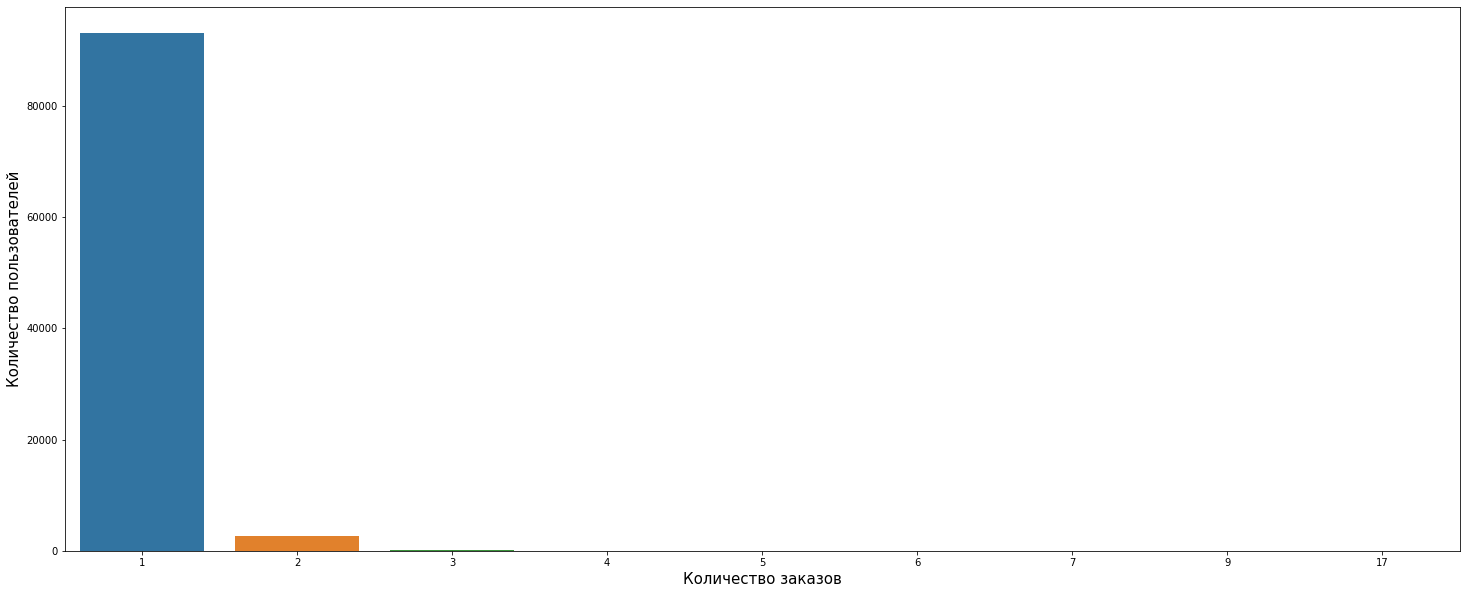

In [9]:
plt.figure(figsize=(25,10))
sns.countplot(data = orders_by_customer, x = 'count_of_orders')
plt.xlabel('Количество заказов', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)

На графике прекрасно видно, что подавляющее большинство пользователей сделали всего 1 заказ.

### Так же было бы интересно посмотреть, как заказы распределены по штатам.


In [10]:
orders_by_state = customers.groupby('customer_state', as_index=False) \
                           .agg({'customer_id' : 'count'}) \
                           .rename(columns={'customer_id' : 'count_of_orders'}) \
                           .sort_values('count_of_orders', ascending=False)
orders_by_state.head()

,customer_state,count_of_orders
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


#### Визуализируем

Text(0, 0.5, 'Количество пользователей')

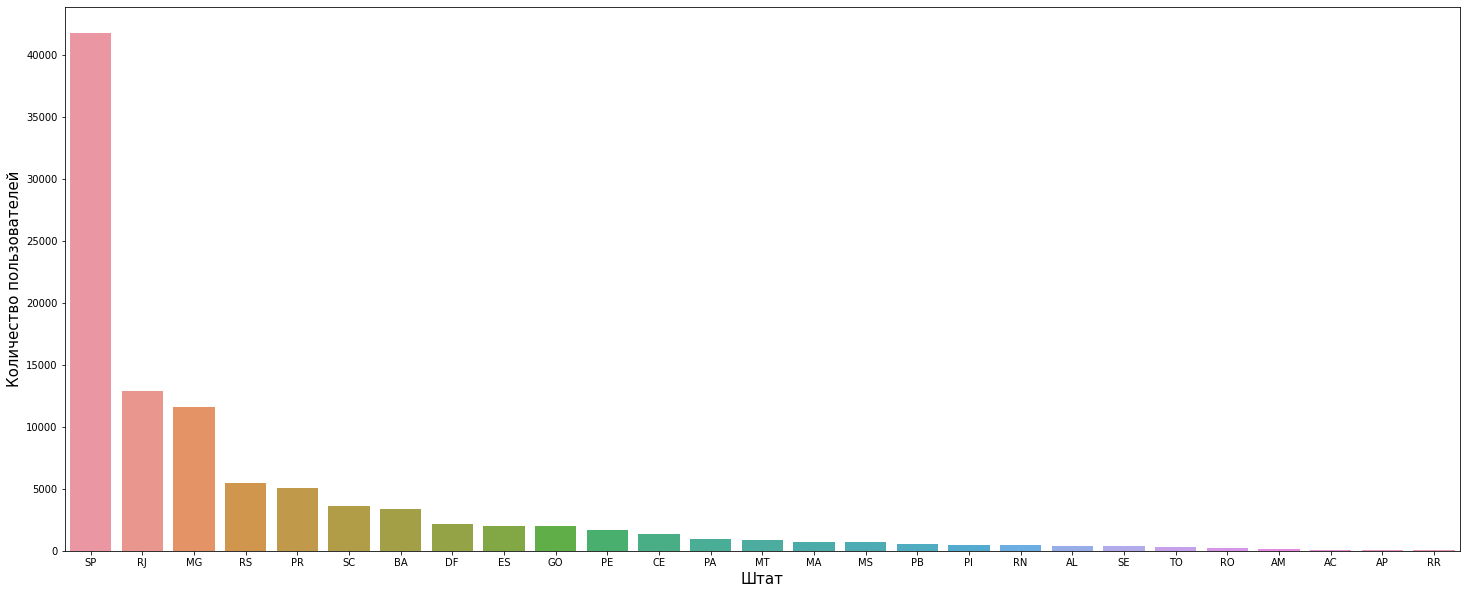

In [11]:
plt.figure(figsize=(25,10))
sns.barplot(data = orders_by_state, x='customer_state', y = 'count_of_orders')
plt.xlabel('Штат', fontsize=15)
plt.ylabel('Количество пользователей', fontsize=15)

На графике видим, что по заказам лидирует штат Сан-Паулу.

### Второй датафрейм (orders):

In [12]:
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Содержит информацию о заказах:



***order_id*** —  уникальный идентификатор заказа (номер чека)

***customer_id*** —  позаказный идентификатор пользователя

***order_status*** —  статус заказа

***order_purchase_timestamp*** —  время создания заказа

***order_approved_at*** —  время подтверждения оплаты заказа

***order_delivered_carrier_date*** —  время передачи заказа в логистическую службу

***order_delivered_customer_date*** —  время доставки заказа

***order_estimated_delivery_date*** —  обещанная дата доставки

### Посмотрим на типы данных и кол-во непустых значений

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Во-первых, видим, что столбцы с датами имеют неподходящий формат. 

***Приводим колонки к нужному типу***

In [14]:
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = \
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

***Проверяем, что все сработало.***

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Во-вторых, в нескольких столбцах присутствуют пустые значения. Посчитаем их:

In [16]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## 1. order_approved_at  — время подтверждения оплаты заказа.

160 заказов не были оплачены?

In [17]:
without_payment = orders.query('order_approved_at == "NaN"')
without_payment

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


На первый взгляд все в порядке. Заказы были отменены, поэтому не оплачивались.

#### Но посмотрим на данные чуть внимательнее.

In [18]:
without_payment.nunique()

order_id                         160
customer_id                      160
order_status                       3
order_purchase_timestamp         160
order_approved_at                  0
order_delivered_carrier_date      13
order_delivered_customer_date     14
order_estimated_delivery_date    109
dtype: int64

Так, у нас имеется 3 уникальных статуса заказа. Получается, были не только отмененные.

Более того, 14 заказов были доставлены без оплаты.

#### Разбираемся дальше. Посмотрим на неоплаченные заказы в разрезе их статуса.

In [19]:
without_payment_by_status = without_payment.groupby('order_status', as_index=False) \
                                           .agg({'order_id' : 'count'}) \
                                           .rename(columns={'order_id':'count_of_orders'}) \
                                           .sort_values('count_of_orders', ascending=False)
without_payment_by_status

,order_status,count_of_orders
0,canceled,141
2,delivered,14
1,created,5


***Итак, что мы имеем:***

canceled - 141 заказ был отменен, поэтому не оплачен. Все нормально.

created - 5 заказов были только созданы, оплата будет произведена позже. Все нормально.

delivered - 14 заказов были доставлены, но не оплачены. ***Что-то не так.***

#### Посмотрим на доставленные, но не оплаченные заказы.

In [20]:
delivered_for_free = without_payment.query('order_status == "delivered"')
delivered_for_free

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


Все 14 заказов по какой-то причине были переданы в логистическую службу без факта их оплаты и затем доставлены потребителю.

### Возможно, произошел технический сбой, из-за которого данные об оплате просто не записались. Посмотрим в какие даты такие заказы были переданы в логистику.

In [21]:
# Берем дату передачи заказа в логичтическую службу без времени, что бы посмотреть в какие ДНИ происходил сбой.
logistic_false = pd.to_datetime(delivered_for_free['order_delivered_carrier_date']).dt.date

In [22]:
logistic_false.value_counts()

2017-02-22    7
2017-02-23    5
2017-01-25    1
2017-01-27    1
Name: order_delivered_carrier_date, dtype: int64

Для двух дней у нас 7 и 5 неоплаченных заказов. Но насколько это критично?

### Посмотрим на общее число доставленных заказов для 22 и 23 февраля 2017 года.

In [23]:
# Сделаем новый датафрейм, что бы посмотреть интересующую нас информацию,
# и при этом оставить исходный датафрейм в первоначальном виде.
orders_by_date = orders.copy(deep=True)

In [24]:
# Помним, что нас интересуют дни. Преобразовываем колонку, что бы время не учитывалось.
orders_by_date['order_delivered_carrier_date'] = pd.to_datetime(orders_by_date['order_delivered_carrier_date']).dt.date

In [25]:
orders_by_date['order_delivered_carrier_date'] = pd.to_datetime(orders_by_date['order_delivered_carrier_date'])

#### Отбираем только нужные нам дни и статус заказа 'delivered'.

In [26]:
fail_days = orders_by_date.query('(order_delivered_carrier_date == "2017-02-22" or order_delivered_carrier_date == "2017-02-23") and order_status =="delivered"')
fail_days.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73,974c1993ab8024d3ed16229183c2308d,a90391a47de936d56c66a5366cba1462,delivered,2017-02-20 11:45:39,2017-02-22 03:10:20,2017-02-23,2017-03-09 14:27:58,2017-03-21
369,6f6665c1d76e55561978ccb45bdcafc6,12ae89712aa5a178c22147486d3cd310,delivered,2017-02-23 08:03:00,2017-02-23 08:15:17,2017-02-23,2017-03-02 09:23:07,2017-04-03
510,9d513821c0477231fc7c1bfd684d13d8,00a6e2753fc2652cb87386ffbf5792b2,delivered,2017-02-20 21:31:59,2017-02-22 06:50:09,2017-02-23,2017-03-21 10:35:41,2017-03-17
959,0adf4c5c9a1399ceefdb7ba880df1ca7,eab22d3171e51fc2a3b380f5da7c7310,delivered,2017-02-22 13:22:13,2017-02-22 13:30:16,2017-02-22,2017-03-28 16:23:53,2017-04-06
2496,008fab5602c441d51f30b1464f5d4643,337e39b83fac394e62eb7876f45ee981,delivered,2017-02-22 10:37:41,2017-02-22 10:50:13,2017-02-22,2017-03-03 12:43:46,2017-03-23


#### Считаем кол-во доставленных 22 и 23 февраля заказов.

In [27]:
count_of_orders_by_fail_days = fail_days.groupby('order_delivered_carrier_date', as_index=False) \
                                        .agg({'order_id' : 'count'}) \
                                        .rename(columns={'order_id':'count_of_orders'}) \
                                        .sort_values('count_of_orders', ascending=False)

count_of_orders_by_fail_days

,order_delivered_carrier_date,count_of_orders
0,2017-02-22,73
1,2017-02-23,55


#### Посчитаем % неоплаченных доставленных заказов, от общего числа доставленных заказов, переданных в логистику в эти два дня.

In [28]:
proc_fail_02_22 = round((7/73) * 100)
proc_fail_02_23 = round((5/55) * 100)
print(f'Неоплаченных заказов, переданных в логистику 22 февраля 2017 года - {proc_fail_02_22}%, 23 февраля 2017 года - {proc_fail_02_23}%.')

Неоплаченных заказов, переданных в логистику 22 февраля 2017 года - 10%, 23 февраля 2017 года - 9%.


***На мой взгляд, проценты внушительные. Так что стоит передать информацию ответственным, что бы разобрались, в чем причина появления таких данных.***

### 2. order_delivered_carrier_date  — время передачи заказа в логистическую службу.

***Пропущено 1783 значения.*** 

In [29]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Отберем только пропущенные значения.

In [30]:
logistic_nan = orders.query('order_delivered_carrier_date == "NaN"')
logistic_nan.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


#### Посмотрим на статусы заказов, которые не были переданы в логистику.

In [31]:
logistic_by_status = logistic_nan.groupby('order_status', as_index=False) \
                           .agg({'order_id' : 'count'}) \
                           .rename(columns={'order_id' : 'count_of_order'}) \
                           .sort_values('count_of_order', ascending = False)

logistic_by_status

,order_status,count_of_order
6,unavailable,609
1,canceled,550
4,invoiced,314
5,processing,301
2,created,5
0,approved,2
3,delivered,2


### Статусы заказов:

***Не должны попасть в логистическую службу, так что пустые значения оправданы:***

unavailable —  недоступен 

canceled —  отменён

invoiced —  выставлен счёт

processing —  в процессе сборки заказа

created —  создан

approved —  подтверждён


***Должны были сперва попасть в логистическую службу. Проблема.***

delivered —  доставлен пользователю

#### Посмотрим на доставленные заказы, которые не отдавали в логистику.

In [32]:
delivered_avoid_logistic = logistic_nan.query('order_status == "delivered"')
delivered_avoid_logistic

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


### И мы снова видим проблему с присвоением статуса "delivered".

В первом случае, заказ не был передан в логистику, но был доставлен, и запись о времени доставки имеется.

Во втором случае, заказ не был передан в логистику, не имеет даты доставки, но статус "доставлен".

### 3. order_delivered_customer_date —  время доставки заказа

***Пропущенных значений — 2965***

In [33]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Отбираем только пропущенные значения.

In [34]:
delivered_nan = orders.query('order_delivered_customer_date == "NaN"')
delivered_nan.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


#### Смотрим на статусы заказов.

In [35]:
not_delivered_status = delivered_nan.groupby('order_status', as_index=False) \
                                    .agg({'order_id' : 'count'}) \
                                    .rename(columns={'order_id' : 'count_of_orders'}) \
                                    .sort_values('count_of_orders', ascending=False)
not_delivered_status

,order_status,count_of_orders
6,shipped,1107
1,canceled,619
7,unavailable,609
4,invoiced,314
5,processing,301
3,delivered,8
2,created,5
0,approved,2


Отсутствующее значение в дате доставке логично объясняется всеми статусами, кроме "delivered". Ведь данный статус должен присваиваться только в случае доставленного заказа, а у нас 8 пустых значений в дате доставки!

In [36]:
delivered_without_date = delivered_nan.query('order_status == "delivered"')
delivered_without_date

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


### Итак, после изучения пустых значений в датафрейме orders, делаем вывод:
***В данных есть проблема со статусом "delivered", так как:*** 

- Часть заказов не была оплачена, но была доставлена пользователям;
- Так же статус доставленных получили заказы, которые каким-то образом избежали логистической службы;
- Часть заказов получила статус "delivered", но не имеет даты доставки.

### Третий датафрейм (products_info)

In [37]:
products_info =  pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg')
products_info.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Содержит информацию о товарных позициях, входящих в заказы:

***order_id*** —  уникальный идентификатор заказа (номер чека)

***order_item_id*** —  идентификатор товара внутри одного заказа

***product_id*** —  ид товара (аналог штрихкода)

***seller_id*** — ид производителя товара

***shipping_limit_date*** —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

***price*** —  цена за единицу товара

***freight_value*** —  вес товара

### Посмотрим на типы данных и наличие пустых значений.

In [38]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### Приводим shipping_limit_date к нужному типу.

In [39]:
products_info['shipping_limit_date'] = pd.to_datetime(products_info['shipping_limit_date'])

#### Перепроверяем

In [40]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Пустых значений нет

In [41]:
products_info.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### Посмотрим, сколько у нас уникальных производителей

In [42]:
products_info.seller_id.nunique()

3095

#### А уникальных товаров?

In [43]:
products_info.product_id.nunique()

32951

#### Посчитаем, какое кол-во товаров представлено каждым из производителей

In [44]:
count_of_product_by_seller = products_info.groupby('seller_id', as_index=False) \
                                          .agg({'product_id' : 'count'}) \
                                          .rename(columns={'product_id' : 'count_of_orders'}) \
                                          .sort_values('count_of_orders', ascending=False)
count_of_product_by_seller

,seller_id,count_of_orders
1235,6560211a19b47992c3666cc44a7e94c0,2033
881,4a3ca9315b744ce9f8e9374361493884,1987
368,1f50f920176fa81dab994f9023523100,1931
2481,cc419e0650a3c5ba77189a1882b7556a,1775
2643,da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...,...
1172,5f57db27027655e6c6a391601daa0258,1
1160,5e25c632f9db6cfb8bc100421c2737b6,1
1159,5e106d93b717c2682b9383da480364a1,1
2561,d36b07fd3c5088e477a72d1fccfe29d4,1


#### Выведем описательную статистику по кол-ву товаров

In [45]:
count_of_product_by_seller.count_of_orders.describe()

count    3095.000000
mean       36.397415
std       119.193461
min         1.000000
25%         2.000000
50%         8.000000
75%        24.000000
max      2033.000000
Name: count_of_orders, dtype: float64

## 3. Приступаем к ответам на вопросы продакт-менеджера Василия.

### 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 


***Совершенной*** будем считать покупку, которая ***была оплачена и получена*** пользователем.

Объединим информацию о пользователях и заказах.

In [130]:
orders_and_customers = orders.merge(customers[['customer_id', 'customer_unique_id']], how = 'inner', on = 'customer_id')

#### Приведем временные колонки к нужному типу

In [47]:
orders_and_customers[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = \
orders_and_customers[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [48]:
orders_and_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
dtypes: datetime64[ns](5), object(4)
memory usage: 7.6+ MB


#### Сначала отберем только доставленные заказы

In [49]:
delivered_orders = orders_and_customers.query('order_status == "delivered"')

#### Оставим только строки, где даты оплаты и доставки в порядке.
Как мы выяснили, со статусом "delivered" есть проблемы. Возможно, даты оплаты и доставки просто не записались, но будем ориентироваться на корректные данные. 

In [50]:
valid_orders = delivered_orders.query('order_approved_at != "NaN" and order_delivered_customer_date != "NaN"')

#### Считаем, сколько покупок совершали пользователи

In [51]:
count_of_orders = valid_orders.groupby('customer_unique_id', as_index=False) \
                        .agg({'order_id' : 'nunique'}) \
                        .rename(columns={'order_id' : 'number_of_orders'}) \
                        .sort_values('number_of_orders', ascending=False)

#### Между делом посмотрим на описательную статистику покупок пользователей.

In [52]:
count_of_orders.number_of_orders.describe()

count    93337.000000
mean         1.033417
std          0.209096
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: number_of_orders, dtype: float64

#### Оставляем только пользователей с 1 покупкой

In [53]:
one_order = count_of_orders.query('number_of_orders == 1')
one_order.number_of_orders.value_counts()

1    90537
Name: number_of_orders, dtype: int64

### Ответ:
Пользователей, которые совершили только 1 покупку — ***90537***

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

Нас интересуют недоставленные заказы, поэтому отфильтруем датафрейм, исключая из него статус "delivered".

In [54]:
not_delivered = orders.query('order_status != "delivered"')

#### Посчитаем кол-во заказов по каждому статусу. 

In [55]:
orders_by_status = not_delivered.groupby('order_status', as_index = False) \
                                .agg({'order_id' : 'count'}) \
                                .rename(columns={'order_id' : 'number_of_order'}) \
                                .sort_values('number_of_order', ascending=False)

In [56]:
orders_by_status

,order_status,number_of_order
5,shipped,1107
1,canceled,625
6,unavailable,609
3,invoiced,314
4,processing,301
2,created,5
0,approved,2


#### Теперь посчитаем общее кол-во месяцев в данных.

Благодаря предварительному анализу мы знаем, что некоторые временные отметки в датафрейме имеют пропущенные значения. Так что будем ориентироваться на данные из столбца даты создания заказа, что бы получить корректное общее число месяцев.

In [57]:
not_delivered.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

In [58]:
# Приводим столбец с датой к строковому типу, и берем дату в виде год-месяц
months = not_delivered['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m-%d')[:7])

In [59]:
months

6        2017-04
44       2018-06
103      2018-08
128      2017-09
154      2018-01
          ...   
99283    2018-08
99313    2018-01
99347    2018-09
99348    2017-08
99415    2017-10
Name: order_purchase_timestamp, Length: 2963, dtype: object

In [60]:
# Считаем уникальные значения
months.nunique()

24

Итак, для подсчета среднего, сумму заказов по каждому статусу делим на кол-во месяцев. Поместим значения в отдельный столбец.

In [61]:
orders_by_status['mean_not_delivered'] = round(orders_by_status['number_of_order'] / 24, 2)

In [62]:
orders_by_status

,order_status,number_of_order,mean_not_delivered
5,shipped,1107,46.12
1,canceled,625,26.04
6,unavailable,609,25.38
3,invoiced,314,13.08
4,processing,301,12.54
2,created,5,0.21
0,approved,2,0.08


### Детализация причин:

#### Отгружены, но не доставлены(shipped) — ***46.12*** 


#### Отменены(canceled)  — ***26.04***


#### Недоступны, нет на складе(unavailable) — ***25.38***


#### Не оплачен выставленный счет(invoiced)  — ***13.08*** 


#### В процессе сборки(processing) — ***12.54***
	

#### Заказ не подтвержден(created) — ***0.21***
	

#### Не передан в доставку(approved) — ***0.08***

### Визуализируем результат

Text(0, 0.5, 'Среднее кол-во недоставленных товаров')

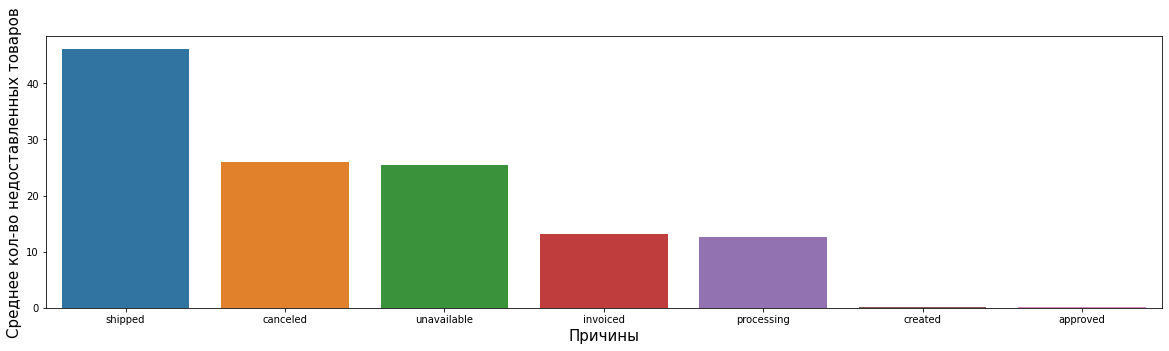

In [63]:
plt.figure(figsize=(20,5))
sns.barplot(data=orders_by_status, x="order_status", y="mean_not_delivered")
plt.xlabel('Причины', fontsize=15)
plt.ylabel('Среднее кол-во недоставленных товаров', fontsize=15)

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

Ранее мы определили, что покупка - это оплаченный и доставленный пользователю товар.

Но вопрос нам задает Продакт-менеджер, и я предположу, что его интересуют ***дни***, в которые пользователи чаще всего ***заказывают*** товары. 

Проще говоря, ***спрос на товары*** по дням недели.

In [64]:
# Объединим датафреймы с заказами и информацией о товарах.
full_orders_info = products_info.merge(orders,  how='right', on='order_id')

In [65]:
full_orders_info.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [66]:
# Создадим колонку с наименованием дня недели 
full_orders_info['day'] = full_orders_info['order_purchase_timestamp'].dt.day_name()

In [67]:
# Посчитаем число заказов для каждого товара по дням недели
products_orders_by_day = full_orders_info.groupby(['product_id','day'], as_index=False) \
                                         .agg({'order_id':'count'}) \
                                         .rename(columns={'order_id' : 'number_of_order'}) \
                                         .sort_values('number_of_order', ascending=False)

In [68]:
products_orders_by_day.head()

,product_id,day,number_of_order
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
41041,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,87
41046,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85


In [69]:
# Сгруппируем по товару, и оставим только дни с максимальным кол-вом заказов.
# keep = 'all' в nlargest() - оставим значения, если товар одинаково часто заказывают в разные дни.
day_with_max_orders = products_orders_by_day.groupby(['product_id'], as_index = False)\
                                            .apply(lambda x: x.nlargest(1,['number_of_order'], keep = 'all')) \
                                            .sort_values('number_of_order', ascending=False) 

### Датафрейм, в котором лежит информация о том, в какой день каждый товар чаще всего заказывают:

In [70]:
day_with_max_orders.head()

,,product_id,day,number_of_order
8613,15902,422879e10f46682990de24d770e7f83d,Wednesday,93
19742,36513,99a4788cb24856965c36a24e339b6058,Monday,92
22112,41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
10867,20127,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
7364,13537,389d119b48cf3043d311335e499d9c6b,Thursday,67


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
### Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

В задании нас просят расчитать ***покупки***, так что используем датафрейм из первого задания, где объединена информация о пользователях и их заказах, с корректными датами доставки и оплаты.

In [71]:
valid_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6


Так же нас просят учесть кол-во недель в месяцах. Для расчета будем использовать ***.dt.daysinmonth*** (считает число дней в месяце) и делить на ***7*** (дни недели). Создадим новый столбец с этими данными.

In [72]:
valid_orders['numbers_of_weeks'] = valid_orders.order_purchase_timestamp.dt.daysinmonth / 7

In [73]:
# Создадим датафрейм только с нужной нам информацией.
orders_per_week = valid_orders[['customer_unique_id', 'order_id', 'numbers_of_weeks', 'order_delivered_customer_date']]

In [74]:
# Так же немного преобразуем дату доставки, оставив только месяц и год.
orders_per_week['order_delivered_customer_date'] = orders_per_week['order_delivered_customer_date'].dt.strftime('%Y-%m')

In [75]:
orders_per_week

,customer_unique_id,order_id,numbers_of_weeks,order_delivered_customer_date
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,4.428571,2017-10
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,4.428571,2018-08
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,4.428571,2018-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,4.285714,2017-12
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,4.000000,2018-02
...,...,...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,4.428571,2017-03
99437,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,4.000000,2018-02
99438,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,4.428571,2017-09
99439,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,4.428571,2018-01


In [76]:
# Посчитаем число покупок в месяц для каждого пользователя и вернем число недель в соответствующем месяце
orders_per_week_count = orders_per_week.groupby(['customer_unique_id','order_delivered_customer_date'], as_index=False) \
                              .agg({'order_id': 'count','numbers_of_weeks': 'mean'}) \
                              .rename(columns={'order_id': 'number_of_orders', 'order_delivered_customer_date': 'month'})

In [77]:
# Посчитаем среднее число покупок в месяц для каждого пользователя
orders_per_week_count['mean_weekly_orders'] = orders_per_week_count.number_of_orders / orders_per_week_count.numbers_of_weeks

In [78]:
orders_per_week_count.head()

,customer_unique_id,month,number_of_orders,numbers_of_weeks,mean_weekly_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-04,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714,0.233333


#### Меняем структуру таблицы, что бы видеть среднее число покупок пользователей по месяцам.

In [79]:
orders_per_week_mean = orders_per_week_count.pivot(index='customer_unique_id',
                                                    columns='month',
                                                    values='mean_weekly_orders').fillna(0)
orders_per_week_mean

month,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.225806,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.225806,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.00,0.0,0.225806,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.233333,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,...,0.225806,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Из таблицы делаем вывод, что активность пользователей крайне низка. 

## 5. Выполните когортный анализ пользователей. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц.

***Когорта*** — это группа людей, которая совершила нужное действие в определенный промежуток времени.

***Когортный анализ*** — это наблюдение за когортами. Выбираем одну или несколько метрик, измеряем их и делаем выводы.

В нашем случае метрикой выступает ***retention***.

***Retention*** — это метрика, отвечающая на вопрос, сколько людей вернулись в день Х (неделю Х, месяц Х) после первого входа в продукт. Измеряется в процентах, то есть показывает долю вернувшихся людей от изначально пришедших.

#### Что бы сформировать когорты берем не отфильтрованный датафрейм с информацией о пользователях и их заказах.

In [80]:
# определим месяц каждого заказа
orders_and_customers['month_of_order'] = orders_and_customers['order_purchase_timestamp'].dt.to_period('M')

In [81]:
# Сформируем когорты по первому месяцу заказа для каждого пользователя 
orders_and_customers['cohort'] = orders_and_customers.groupby('customer_unique_id')['order_purchase_timestamp'] \
                                                     .transform('min').dt.to_period('M')
orders_and_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,month_of_order,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,2018-07,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02


In [82]:
# Имеющиеся когорты
orders_and_customers.cohort.unique()

<PeriodArray>
['2017-09', '2018-07', '2018-08', '2017-11', '2018-02', '2017-07', '2017-04',
 '2017-05', '2017-01', '2018-06', '2018-03', '2016-10', '2017-12', '2017-10',
 '2018-01', '2018-05', '2017-08', '2018-04', '2017-03', '2017-06', '2017-02',
 '2016-09', '2018-09', '2016-12', '2018-10']
Length: 25, dtype: period[M]

В задании нас просят выявить когорту с января по декабрь. По имеющимся данным видим, что этому запросу удовлетворяет 2017 год (2018 и 2016 - неполные). Отфильтруем нужные когорты.

In [83]:
orders_and_customers = orders_and_customers.loc[(orders_and_customers.cohort >='2017-01') & (orders_and_customers.cohort <= '2017-12')]
orders_and_customers.cohort.unique()

<PeriodArray>
['2017-09', '2017-11', '2017-07', '2017-04', '2017-05', '2017-01', '2017-12',
 '2017-10', '2017-08', '2017-03', '2017-06', '2017-02']
Length: 12, dtype: period[M]

In [84]:
orders_and_customers.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,month_of_order,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,2017-07,2017-07


In [85]:
# Считаем количество уникальных пользователей, которые создали заказы в каждый из месяцев
cohort_df = orders_and_customers.groupby(['cohort', 'month_of_order'],  as_index = False) \
                                .agg({'customer_unique_id' : 'nunique'}) \
                                .rename(columns={'customer_unique_id' : 'customers_by_month'})

In [86]:
# Добавляем столбец с количеством месяцев от первой покупки
cohort_df['month_from_start'] = (cohort_df.month_of_order - cohort_df.cohort).apply(attrgetter('n'))

In [87]:
# Меняем структуру таблицы, где столбцами будут месяцы от первого заказа, а значениями кол-во пользователей. 
cohort_by_months = cohort_df.pivot_table(index='cohort', columns='month_from_start', values='customers_by_month').fillna(0)
cohort_by_months

month_from_start,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,0.0,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,0.0
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,0.0
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,0.0,0.0
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,0.0,0.0,0.0
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0
2017-07,3894.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2017-08,4184.0,29.0,14.0,11.0,15.0,22.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09,4130.0,28.0,22.0,12.0,19.0,9.0,9.0,10.0,12.0,7.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Посчитаем Retention Rate
retention = (cohort_by_months.divide(cohort_by_months[0], axis=0))

In [89]:
# Находим когорту с самым высоким retention для 3 месяца.
retention[3].idxmax()

Period('2017-06', 'M')

### Ответ: 
В период с января по декабрь когорта с самым высоким retention на 3-й месяц - ***2017-06***

### Визуализируем результат:

In [90]:
 ur_style = (retention
            .style
            .set_caption('Cohort Retention')  
            .background_gradient(cmap='YlOrRd')  
            .highlight_null('white')  
            .format("{:.2%}", na_rep=""))  
ur_style

month_from_start,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,0.00%,0.39%,0.13%,0.79%,0.39%,0.13%,0.13%,0.26%,0.39%,0.13%
2017-02,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,0.29%,0.17%,0.17%,0.11%,0.06%,0.06%,0.23%,0.00%
2017-03,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%,0.00%
2017-04,100.00%,0.60%,0.21%,0.17%,0.34%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.21%,0.00%,0.00%
2017-05,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.25%,0.33%,0.25%,0.03%,0.19%,0.25%,0.00%,0.00%,0.00%
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%,0.00%,0.00%,0.00%,0.00%
2017-07,100.00%,0.51%,0.36%,0.26%,0.28%,0.21%,0.31%,0.10%,0.18%,0.26%,0.23%,0.31%,0.13%,0.26%,0.00%,0.00%,0.00%,0.00%,0.00%
2017-08,100.00%,0.69%,0.33%,0.26%,0.36%,0.53%,0.29%,0.26%,0.14%,0.14%,0.24%,0.19%,0.10%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2017-09,100.00%,0.68%,0.53%,0.29%,0.46%,0.22%,0.22%,0.24%,0.29%,0.17%,0.27%,0.07%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


## 6. Построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 

#### ***RFM*** — это метод, используемый для анализа потребительской ценности.


Для RFM-анализа нам потребуются определенные данные о каждом из клиентов:

- customer_unique_id - для их идентификации.

- Давность (R) как количество дней с момента последней покупки. 

- Частота (F) как суммарное количество покупок у пользователя за всё время.

- Деньги (М) как сумма покупок за всё время.

In [91]:
# Используем только корректные данные без пропущенных значений.
# Создаем датафрейм с нужной нам информацией.
full_data = valid_orders.merge(products_info,  how='right', on='order_id')

In [92]:
last_date = full_data.order_purchase_timestamp.max()
RFM_table = full_data.groupby('customer_unique_id', as_index=False) \
                     .agg({'order_purchase_timestamp': lambda x: (last_date - x.max()).days,
                           'order_id': lambda x: len(x.unique()),
                           'price': lambda x: x.sum()}) \
                     .rename(columns={'order_purchase_timestamp' : 'recency',
                                      'order_id' : 'frequency',
                                      'price' : 'monetary'})

### Посмотрим на распределения.

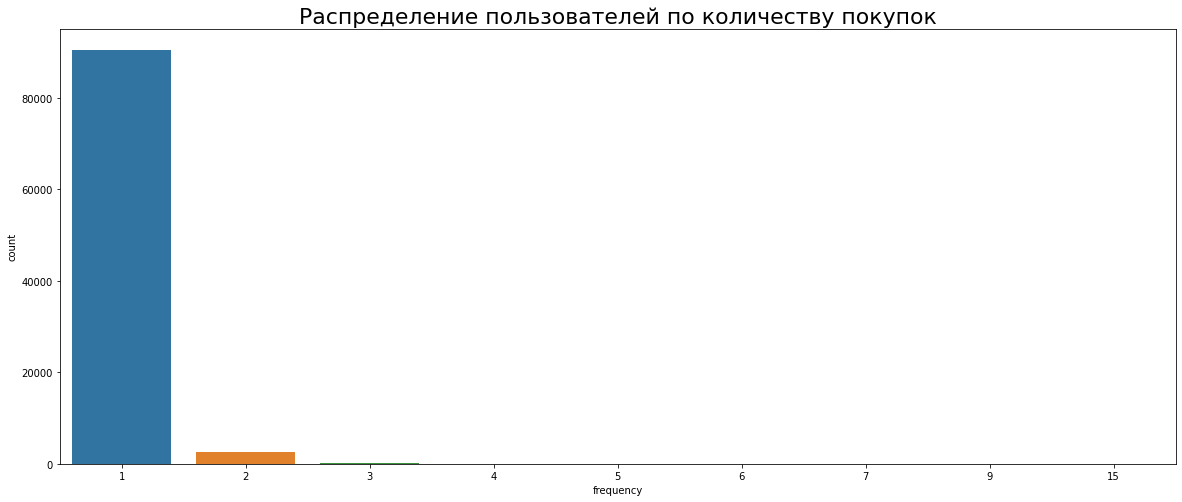

In [93]:
plt.figure(figsize = (20, 8))
sns.countplot(RFM_table.frequency)
plt.title('Распределение пользователей по количеству покупок', fontsize=22)
plt.show()

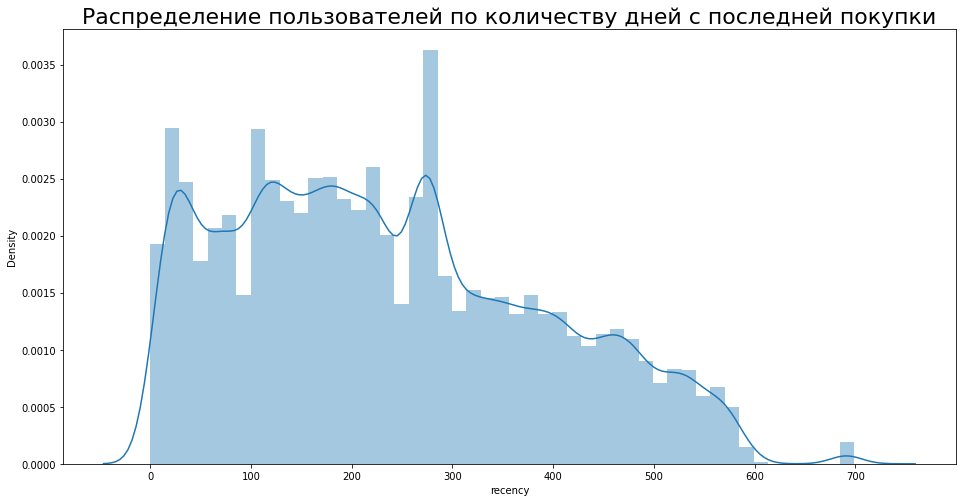

In [94]:
plt.figure(figsize = (16, 8))
sns.distplot(RFM_table.recency)
plt.title('Распределение пользователей по количеству дней с последней покупки', fontsize=22)
plt.show()

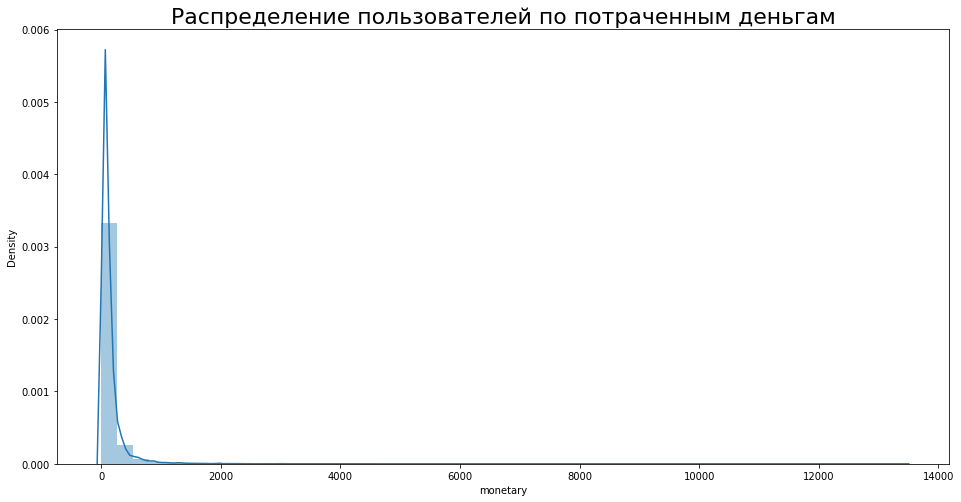

In [95]:
plt.figure(figsize = (16, 8))
sns.distplot(RFM_table.monetary)
plt.title('Распределение пользователей по потраченным деньгам', fontsize=22)
plt.show()

In [96]:
# Посмотрим на описательную статистику.
RFM_table.describe()

,recency,frequency,monetary
count,93337.000000,93337.000000,93337.000000
mean,236.904893,1.033417,141.622063
std,152.552478,0.209096,215.713022
min,0.000000,1.000000,0.850000
25%,113.000000,1.000000,47.650000
50%,218.000000,1.000000,89.700000
75%,345.000000,1.000000,154.700000
max,713.000000,15.000000,13440.000000


#### Первые выводы: 
1. Как видно на графиках, распределения recency, frequency и monetary НЕ нормальные.
2. Frequency - абсолютное большинство пользователей совершили всего 1 покупку.
3. Monetary - мы можем видеть большую разницу между средним чеком и максимальным.

### Frequency

In [97]:
# Посмотрим на кол-во покупок.
RFM_table.frequency.value_counts()

1     90537
2      2572
3       181
4        28
5         9
6         5
7         3
15        1
9         1
Name: frequency, dtype: int64

#### На основе имеющихся у нас данных, предлагаю следующую сегментацию:

Частые покупки(1) -  3 и более покупок

Редкие покупки(2) - 2 покупки

Разовая покупка(3) - 1 покупка

In [98]:
# Создадим функцию для определения сегмента пользователя по frequency. 

def frequency_segmentation (x):
    if x == 1:
        return 3
    elif x == 2:
        return 2
    else:
        return 1

In [99]:
RFM_table['F_segment'] = RFM_table.frequency.apply(frequency_segmentation)

In [100]:
RFM_table

,customer_unique_id,recency,frequency,monetary,F_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3
2,0000f46a3911fa3c0805444483337064,536,1,69.00,3
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,3
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,3
...,...,...,...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,1570.00,3
93333,fffea47cd6d3cc0a88bd621562a9d061,261,1,64.89,3
93334,ffff371b4d645b6ecea244b27531430a,567,1,89.90,3
93335,ffff5962728ec6157033ef9805bacc48,118,1,115.00,3


### Recency

In [101]:
RFM_table.recency.describe()

count    93337.000000
mean       236.904893
std        152.552478
min          0.000000
25%        113.000000
50%        218.000000
75%        345.000000
max        713.000000
Name: recency, dtype: float64

***Если бы было понимание того, что конкретно продает компания, было бы проще разделить покупателей на сегменты. Машина купленная год назад - недавняя покупка, в то время как шампунь купленный год назад - это явно давно.***

Исходя из имеющихся данных, я предполагаю, что мы имеем дело с маркетплейсом. Так как у нас есть 3095 уникальных производителя и 32951 уникальных товаров.

In [102]:
full_data.seller_id.nunique()

3095

In [103]:
full_data.product_id.nunique()

32951

#### Так что сегментация для Recency:

Клиент был недавно(1) - исходя из здравово смысла, будем считать, что такой клиент сделал заказ не больше месяца назад.

«Засыпающий» клиент(2) - таким клиентам дадим окно в 3 месяца.

Был очень давно(3) - последняя покупка более 3 месяцев назад.
 

In [104]:
# Функция для сегмантации по recency
def recency_segmentation(x):
    if x <= 30:
        return 1
    elif x <= 90:
        return 2
    else:
        return 3

In [105]:
RFM_table['R_segment'] = RFM_table.recency.apply(recency_segmentation)

In [106]:
RFM_table

,customer_unique_id,recency,frequency,monetary,F_segment,R_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,3,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,3
2,0000f46a3911fa3c0805444483337064,536,1,69.00,3,3
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,3,3
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,3,3
...,...,...,...,...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,1570.00,3,3
93333,fffea47cd6d3cc0a88bd621562a9d061,261,1,64.89,3,3
93334,ffff371b4d645b6ecea244b27531430a,567,1,89.90,3,3
93335,ffff5962728ec6157033ef9805bacc48,118,1,115.00,3,3


### Monetary

In [107]:
RFM_table.monetary.describe()

count    93337.000000
mean       141.622063
std        215.713022
min          0.850000
25%         47.650000
50%         89.700000
75%        154.700000
max      13440.000000
Name: monetary, dtype: float64

Визуализируем показатель.

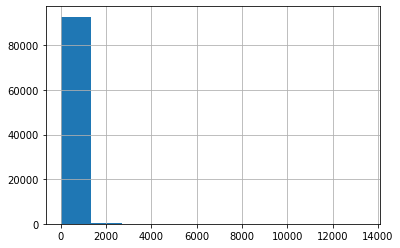

In [108]:
RFM_table.monetary.hist()

Видим, что большая часть наблюдений сосредоточена до 2000. 
Отсеем выбросы, что бы посмотреть на корректную статистику.

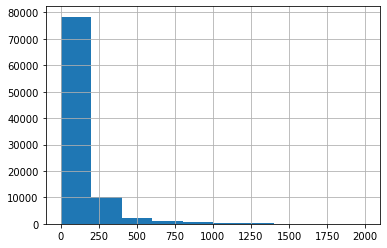

In [109]:
RFM_table.query('monetary < 2000').monetary.hist()

In [110]:
RFM_table.query('monetary < 2000').monetary.describe()

count    93195.000000
mean       137.361757
std        178.581497
min          0.850000
25%         47.600000
50%         89.500000
75%        153.000000
max       1999.990000
Name: monetary, dtype: float64

#### Сегментация для monetary:

***Ориентируясь на график:***

Высокий чек(1) - 200 и больше

Средний чек(2) - между 137 и 200

Низкий чек(3) - меньше 137

In [111]:
# Функция для сегмантации по monetary
def monetary_segmentation(x):
    if x >= 200:
        return 1
    elif x >= 137:
        return 2
    else:
        return 3

In [112]:
RFM_table['M_segment'] = RFM_table.monetary.apply(monetary_segmentation)

#### Добавим итоговый RFM_segment для каждого покупателя

In [113]:
RFM_table['RFM_segment'] = RFM_table['R_segment'].map(str) + RFM_table['F_segment'].map(str) + RFM_table['M_segment'].map(str)

In [114]:
RFM_table.head()

,customer_unique_id,recency,frequency,monetary,F_segment,R_segment,M_segment,RFM_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,3,3,3,333
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,3,3,333
2,0000f46a3911fa3c0805444483337064,536,1,69.00,3,3,3,333
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,3,3,3,333
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,3,3,2,332


In [115]:
# Проверим, корректно ли у нас образовались сегменты. Всего их должно быть 27.
RFM_table.RFM_segment.nunique()

27

#### Для каждого класса построим границы показателей monetary, frecuency и recency

In [116]:
rfm_by_classes = RFM_table.groupby('RFM_segment', as_index = False).agg(n_customers = ('customer_unique_id', 'nunique')\
                                                     , recency_min = ('recency', 'min')\
                                                     , recency_max = ('recency', 'max')\
                                                     , frecuency_min = ('frequency', 'min')\
                                                     , frecuency_max = ('frequency', 'max')\
                                                     , monetary_min = ('monetary', 'min')\
                                                     , monetary_max = ('monetary', 'max'))

### Задание 6. Ответ:

In [117]:
rfm_by_classes

,RFM_segment,n_customers,recency_min,recency_max,frecuency_min,frecuency_max,monetary_min,monetary_max
0,111,19,1,29,3,15,253.70,4080.00
1,112,1,10,10,3,3,169.70,169.70
2,113,5,2,26,3,3,62.98,127.90
3,121,90,0,30,2,2,202.69,1684.29
4,122,37,1,29,2,2,137.50,199.80
5,123,63,0,30,2,2,22.76,135.90
6,131,955,0,30,1,1,200.00,4399.87
7,132,910,0,30,1,1,137.00,199.99
8,133,4922,0,30,1,1,2.20,136.90
9,211,29,31,89,3,7,201.70,1650.00


### Задание 6. Визуализация.

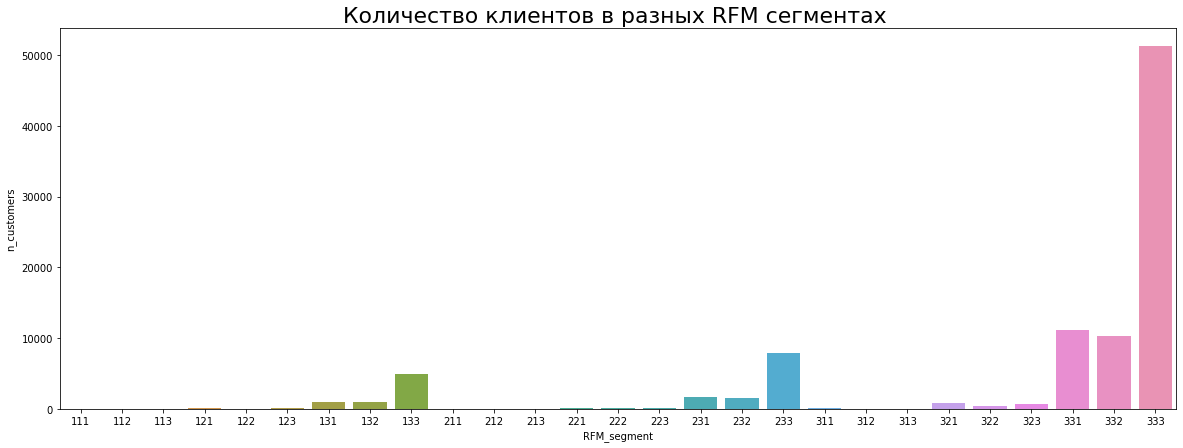

In [118]:
plt.figure(figsize = (20, 7))
plt.title('Количество клиентов в разных RFM сегментах ', fontsize = 22)
sns.barplot(data = rfm_by_classes, x = 'RFM_segment', y = 'n_customers')

Бросается в глаза огромное кол-во клиентов из сегмента 333. Т.е в большинстве своем пользователи совершают только 1 покупку и больше не возвращаются. Это очень тревожный показатель.

In [119]:
rfm_revenue = RFM_table.groupby('RFM_segment', as_index = False).agg({'monetary' : 'sum'})
rfm_revenue.head(3)

,RFM_segment,monetary
0,111,13347.71
1,112,169.70
2,113,446.52


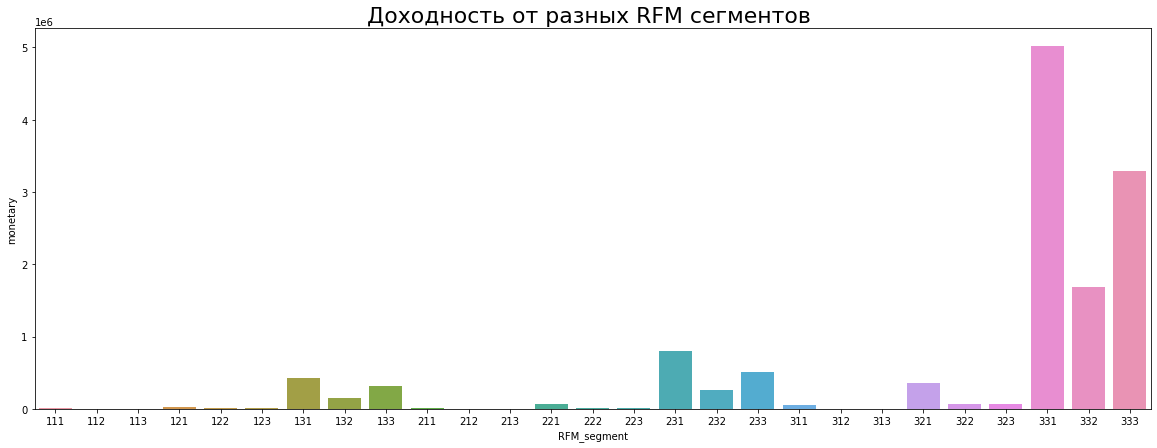

In [120]:
plt.figure(figsize = (20, 7))
plt.title('Доходность от разных RFM сегментов ', fontsize = 22)
sns.barplot(data = rfm_revenue, x = 'RFM_segment', y = 'monetary')  

Опять же видим, что самую большую выручку нам принесли пользователи из сегментов 331, 332 и 333, которые не продолжили взаимодействие с магазином после первой покупки. 

### Далее - стратегия работы с RFM-сегментами.

Разберем матрицу полученных сегментов по RFM, чтобы понять, как выстраивать с ними маркетинговые коммуникации. Разобьем их условно на три большие группы — «отток», «пассивные клиенты» и «активные клиенты».

### 1. Сегмент оттока

Этот сегмент включает тех, кто давно не покупал или купил лишь однажды, но больше не вернулся.

***Тип - 331, 332, 333***

In [121]:
rfm_by_classes.query('RFM_segment in ["331","332","333"]').n_customers.sum()

72572

Разовые клиенты, которые не продолжили взаимодействие с магазином после первой покупки.
Неутешительные цифры. 72572 пользователя не вернулись.

Вывод:

Эти клиенты, скорее всего, не вернутся. На всякий случай им можно отправить реактивационную рассылку с промокодом. Если они не читают рассылки более года, их можно удалить из базы.

***Тип - 321, 322, 323***

In [122]:
rfm_by_classes.query('RFM_segment in ["321","322","323"]').n_customers.sum()

2013

2013 клиентов, покупавших время от времени, но нерегулярно. Возможно, они покупают в том числе у конкурентов.

Вывод:

В случае с этим сегментом важно понять, что поможет клиенту обращаться к вам чаще. Накопительные скидки или индивидуальные предложения со скидками могут мотивировать клиента вернуться от конкурентов.

***Тип - 311, 312, 313***

In [123]:
rfm_by_classes.query('RFM_segment in ["311","312","313"]').n_customers.sum()

168

168 клиентам раньше нравился продукт, потому что они его часто покупали. Но по какой-то причине они перестали это делать.

Вывод: 

Таких клиентов следует вернуть. Это можно сделать с помощью рассылки, в которой будет информация о скидках, программе лояльности и так далее.

### 2. Пассивные клиенты

Это клиенты, которые покупали не слишком давно, поэтому, вероятно, их еще можно вернуть.

***Тип - 221, 222, 223, 231, 232, 233***

In [124]:
rfm_by_classes.query('RFM_segment in ["221","222","223", "231","232","233"]').n_customers.sum()

11547

11547 пользователей. Сюда входят относительно недавние клиенты, которые покупают с разной частотой и на разную сумму. Эти клиенты находятся в средней зоне — они могут стать постоянными, а могут уйти в сегмент оттока.

Вывод:

Важно вовремя присылать персональные подборки и предложения скидок, чтобы поддерживать интерес клиентов.

***Тип - 213, 212, 211***

In [125]:
rfm_by_classes.query('RFM_segment in ["213","212","211"]').n_customers.sum()

35

35 относительно недавних клиентов, которые часто покупали, но потом перестали.

Вывод:

Можно провести опрос, чтобы выяснить, почему клиент перестал покупать. После этого стоит попытаться его вернуть, предлагая бонусы или промокоды.

### 3. Активные клиенты

Сюда входят клиенты, которые только познакомились с магазином или покупали недавно.


***Тип - 131, 132, 133***

In [126]:
rfm_by_classes.query('RFM_segment in ["131","132","133"]').n_customers.sum()

6787

6787 новых клиентов, которые недавно совершили одну-две покупки.

Вывод:

Для новичков обязательно должны быть прогревающие цепочки, подробно рассказывающие о магазине.

***Тип - 121, 122, 123***

In [127]:
rfm_by_classes.query('RFM_segment in ["121","122","123"]').n_customers.sum()

190

190 активных клиентов, которые покупают время от времени на разную сумму.

Вывод:

Нужно поддерживать интерес клиентов к товарам: сообщать про новинки, отправлять предложения с сопутствующими товарами или аксессуарами к тем товарам, которые они уже купили.
Постоянных клиентов, которые недавно совершили покупку, стоит регулярно спрашивать их мнение о покупке, чтобы вовремя понять, что что-то пошло не так.

***Тип - 111, 112, 113***

In [128]:
rfm_by_classes.query('RFM_segment in ["111","112","113"]').n_customers.sum()

25

Всего 25 постоянных клиентов, которые готовы регулярно покупать.

Вывод:

Для сегмента с маленьким чеком можно попробовать увеличить сумму с помощью акций — например, купи на сумму N и получи подарок или скидку.

Сегменту со средним чеком стоит отправлять персональные подборки и акции, чтобы поддерживать интерес.

VIP-клиентам, которые покупают постоянно и на большие суммы, следует уделить особое внимание. Возможно, сделать особую систему привилегий и сервисов или предоставить персонального менеджера.

### Подводим итог. 

У магазина дифицит постоянных, лояльных и крупных клиентов. По сути, вся клиентская база состоит из пользователей с одной покупкой, которые больше не вернулись.

Так что маркетинговая стратегия должна быть направлена на удержание все еще активных клиентов. И выяснение причин такого большого оттока пользователей, и их последующее возвращение (по возможности).